# CROCUS Urban Canyons - Surface Heterogeneity Investigation

----

## Overview
For [CROCUS](https://crocus-urban.org/), the Urban Canyon field campaign observed surface conditions within Chicago, focused around the Univeristy of Illinois - Chicago (UIC). The purpose of this campaign was to provide high resolution observations to compare against our [high resolution street-scale atmospheric models](https://crocus-urban.org/news/research-highlight/2024/09/18/air-temperature/). 

We are going to focus on two instrumented [10 meter tower sites](https://portal.sagecontinuum.org/node/W096) used during the field campaign to provide measurements of temperature and wind speed/direction critical for model evalution.

These sites at UIC, while providing the same observations, were situated over completely different surface conditions (greenhouse vs parking lot).

Through comparison of these observations, we will investigate the role of surface conditions on the local atmospheric conditions. 

<img src="../images/OBrien_CROCUS_UrbanCanyons_ADM.jpeg" width=500 alt="CROCUS ADM Node"></img>

## Prerequisites

Before we begin, you should be aware of these examples and documentation! 

The [Project Pythia](https://projectpythia.org/) has tremendous examples and *foundations* to explore. 

| Concepts | Importance | Notes |
| --- | --- | --- |
| [Getting Started with Python](https://foundations.projectpythia.org/foundations/getting-started-python.html) | Necessary | The Basics
| [Getting Started with Jupyter](https://foundations.projectpythia.org/foundations/getting-started-jupyter.html) | Necessary | Learn This Notebook Interface
| [Working with Pandas Dataframes](https://foundations.projectpythia.org/core/pandas.html) | Helpful | Understanding CSV Data Objects
| [X-Array!](https://foundations.projectpythia.org/core/xarray.html) | Helpful | Working with NetCDF Objects

- **Time to Learn**: 60-120 minutes

## Imports

In [1]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.dates import DateFormatter

## Read in the CROCUS Argonne Deployable Mast (ADM) 3D Sonic Data

Typically, in order to do analysis on a dataset, we need to bring it into our working environment.  
A file has been pre-staged for our use, but you can also find sources that are available to be streamed

In [2]:
ds = xr.open_dataset('../data/crocus-adm-sonic3d-a0-20240727-000000.nc')

That's it! 1 line and we read in an entire day's worth of data!

## Inspect the Dataset
Now that we have the dataset read into this environment, let's see what we have

In [3]:
ds

<xarray.Dataset> Size: 3MB
Dimensions:      (time: 86400)
Coordinates:
  * time         (time) datetime64[ns] 691kB 2024-07-27T05:00:00 ... 2024-07-...
Data variables:
    temperature  (time) float64 691kB ...
    w-wind       (time) float64 691kB ...
    u-wind       (time) float64 691kB ...
    v-wind       (time) float64 691kB ...

<div class="admonition alert alert-info">
    <p class="admonition-title" style="font-weight:bold">Question</p>
    Does anyone know why these values start at 05:00:00 on 27 July?
    What is the frequency of this data?
</div>

### Access the air temperature data within the dataset

In [4]:
ds['temperature'].data

array([23.28316667, 23.29166667, 23.29346667, ..., 24.79323333,
       24.78343333, 24.77303333])

### Find the Mean temperature between 11am-Noon (Chicago Time)

In [5]:
ds.sel(time=slice('20240727T16:00:00', '20240727T17:00:00'))

<xarray.Dataset> Size: 144kB
Dimensions:      (time: 3601)
Coordinates:
  * time         (time) datetime64[ns] 29kB 2024-07-27T16:00:00 ... 2024-07-2...
Data variables:
    temperature  (time) float64 29kB 25.83 25.77 26.01 26.35 ... 26.3 26.5 26.44
    w-wind       (time) float64 29kB ...
    u-wind       (time) float64 29kB ...
    v-wind       (time) float64 29kB ...

In [6]:
ds.sel(time=slice('20240727T16:00:00', '20240727T17:00:00')).mean()

<xarray.Dataset> Size: 32B
Dimensions:      ()
Data variables:
    temperature  float64 8B 25.65
    w-wind       float64 8B -0.2023
    u-wind       float64 8B -1.874
    v-wind       float64 8B 0.3291

## Plot the Data (made easy with xarray)

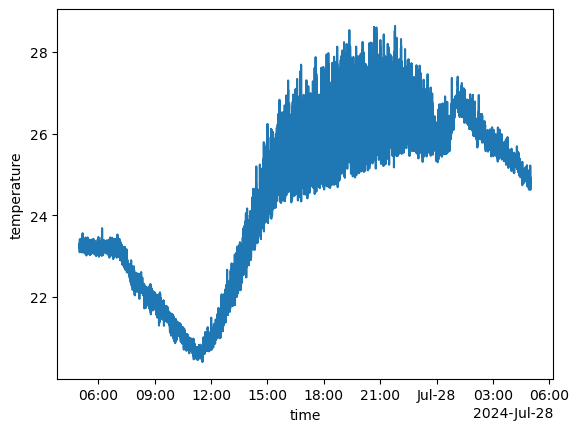

In [7]:
ds['temperature'].plot()

### Average (or 'resample') the Data to 1 min Averages and Display

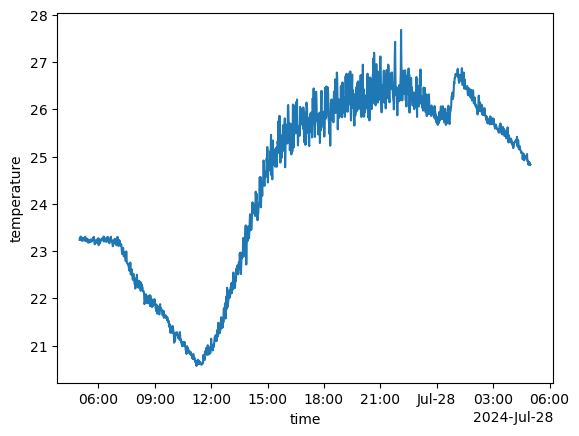

In [8]:
ds.resample(time="1min").mean().temperature.plot()

### Make a Timeseries Display with all three wind components

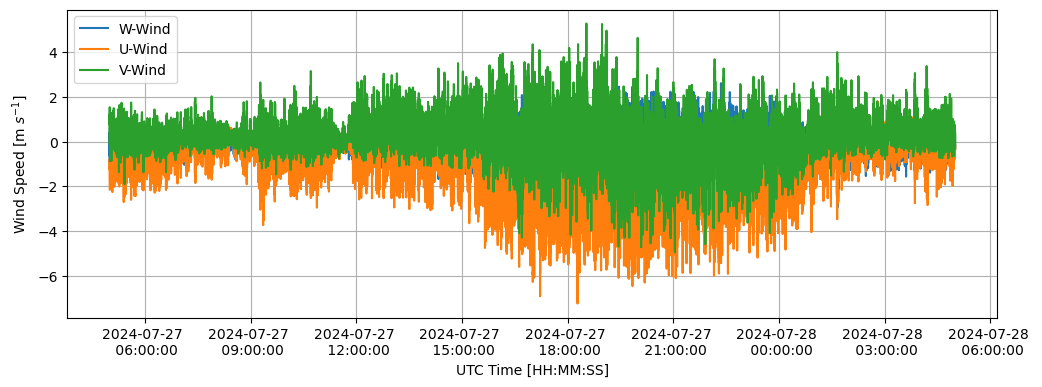

In [9]:
fig, axs = plt.subplots(figsize=(12, 4))

# Define Format of how the date is displayed
date_form = DateFormatter("%Y-%m-%d \n %H:%M:%S")

# Note: send the matplotlib axes to the xarray plotting!
ds['w-wind'].plot(ax=axs, label='W-Wind')
ds['u-wind'].plot(ax=axs, label='U-Wind')
ds['v-wind'].plot(ax=axs, label='V-Wind')

# Now define all the axis labels for the figure
axs.set_xlabel('UTC Time [HH:MM:SS]')
axs.set_ylabel(r'Wind Speed [m $s^{-1}$]') # notice the superscript in the plot!

# Define the legend
axs.legend(loc='upper left')

axs.xaxis.set_major_formatter(date_form)
axs.grid(True)

## Assignments

This past summer, my SULI intern compared various observations across multiple CROCUS locations to explore atmospheric conditions within the city. Below are questions you could expect to recieve during your internship as part of your analysis. 

<div class="admonition alert alert-success">
    <p class="admonition-title" style="font-weight:bold">Question 1</p>
    The vertical mixing of the atmospheric is critical for transporting mositure, temperature and particulate matter aloft. Is there a relationship between veritcal wind speed (i.e. w-wind) and air temperature at the UIC 10 meter tower?
</div>

<div class="admonition alert alert-warning">
    <p class="admonition-title" style="font-weight:bold">Question 2</p>
    Do land surface characteristics (i.e. grass, pavement, concrete, etc) have an impact on local air temperature? With knowledge that the ADM 10 meter tower sits above a black-top parking lot and a second identical tower sits around the corner next to a greenhouse, compare the temperature response at both sites over the day. 
</div>

In [10]:
# Note: the second file is also already staged
ds_adm = xr.open_dataset("../data/crocus-uic-sonic3d-a0-20240727-000000.nc")

<div class="admonition alert alert-danger">
    <p class="admonition-title" style="font-weight:bold">Question 3</p>
     A very common field campaign experience is comparing observations between sites to validate the observations. Directly compare the temperature and wind speeds between the ADM and UIC 10-meter towers. Be careful with the time resolution between files. 
</div>